In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Load the data
data=pd.read_csv('amazon_alexa.tsv', sep='\t')
data.head(2)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1


In [3]:
data.shape

(3150, 5)

In [4]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [5]:
numerical=data.select_dtypes('int')
list(numerical)

['rating', 'feedback']

In [6]:
categorical=data.select_dtypes('object')
list(categorical)

['date', 'variation', 'verified_reviews']

In [7]:
# Check for null values

data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

**Verified_revies has 1 null value.**

In [8]:
data[data['verified_reviews'].isnull()==True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


**Null value row.**

In [9]:
# Dropping the null values

data.dropna(inplace=True)

In [10]:
data.shape

(3149, 5)

**Dropped the null value row.**

In [11]:
# Check for duplicated rows.

data.duplicated().sum()

715

**715 rows are duplicated.**

In [12]:
# Creating a new column as length

In [13]:
data['Length']= data['verified_reviews'].apply(len)

In [14]:
data

,rating,date,variation,verified_reviews,feedback,Length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [15]:
#Analyzing rating column

In [16]:
data.rating.value_counts()

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

In [17]:
#Percentage of the counts

round(data.rating.value_counts(normalize=True)*100),2

(rating
 5    73.0
 4    14.0
 1     5.0
 3     5.0
 2     3.0
 Name: proportion, dtype: float64,
 2)

<Axes: xlabel='rating', ylabel='count'>

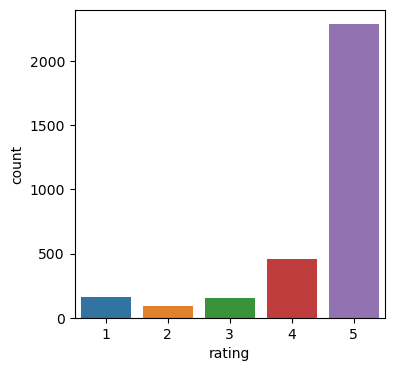

In [18]:
plt.figure(figsize=(4,4))
sns.countplot(x=data.rating)

In [19]:
# Using pie chart

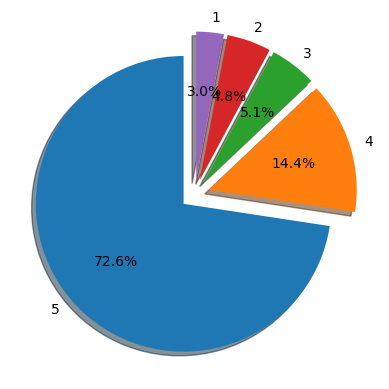

In [20]:
plt.pie(data.rating.value_counts(),autopct='%.1f%%',labels=data['rating'].unique(),explode=[0.1,0.1,0.1,0.1,0.1],shadow=True,startangle=90 )
plt.show()

In [21]:
 # Analysing feedback column

In [22]:
data.feedback.value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

**There are 2 distinct values of 'feedback' present - 0 and 1. Let's see what kind of review each value corresponds to.**

In [23]:
data.feedback.value_counts(normalize=True)

feedback
1    0.918704
0    0.081296
Name: proportion, dtype: float64

<Axes: xlabel='feedback', ylabel='count'>

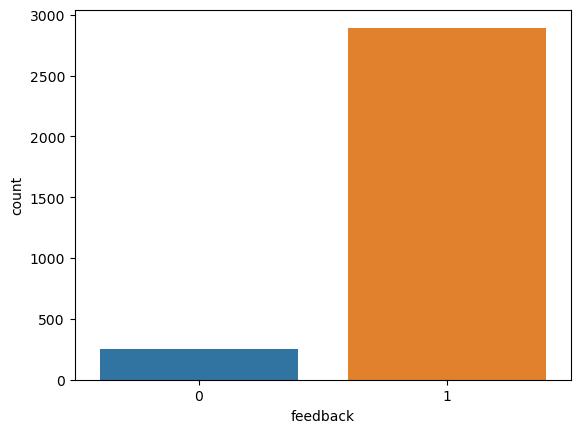

In [24]:
sns.countplot(x=data.feedback)

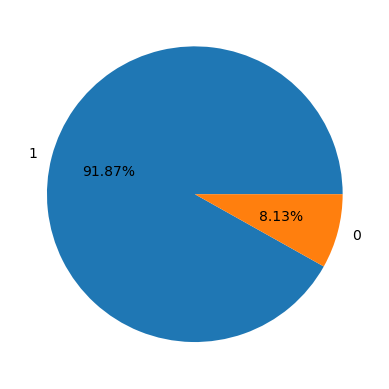

In [25]:
plt.pie(x=data.feedback.value_counts(), labels= data['feedback'].unique(), autopct='%.2f%%')
plt.show()

In [26]:
##Extracting the 'verified_reviews' value for one record with feedback = 0

In [27]:
a=(data[data['feedback']==0].iloc[2]['verified_reviews'])
print(a)

Not much features.


In [28]:
b=(data[data['feedback']==1].iloc[1]['verified_reviews'])
print(b)

Loved it!


**By seeing the above we can tell that feedback 0 refers to negative feedback and feedback 1 refers to positive feedback.**

**91.87% are positive feedback and 8.13% are negative feedback.**

In [29]:
# Analyzing the rating columns

In [30]:
data[data['feedback']==0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [31]:
data[data['feedback']==1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

**If rating of a review is 1 or 2 then the feedback is 0 (negative) and if the rating is 3, 4 or 5 then the feedback is 1 (positive).**

In [32]:
#Analyzing variation column

#This column refers to the variation or type of Amazon Alexa product. Example - Black Dot, Charcoal Fabric etc.

In [33]:
data.variation.value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

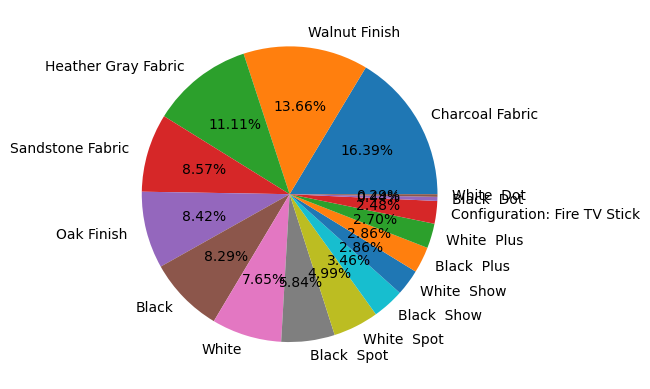

In [34]:
plt.pie(data.variation.value_counts(), labels=data.variation.unique(), autopct='%.2f%%')
plt.show()

Text(0, 0.5, 'count')

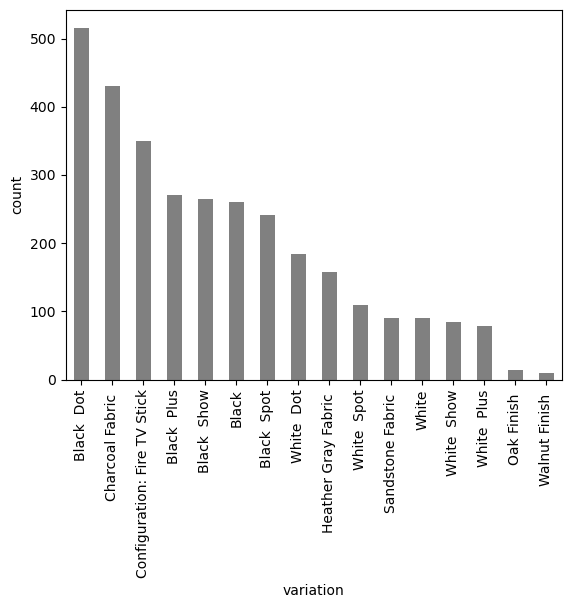

In [35]:
# Another method
# Bar graph

data.variation.value_counts().plot.bar(color='grey')
plt.ylabel('count')

In [36]:
data.variation.value_counts(normalize=True)*100

variation
Black  Dot                      16.386154
Charcoal Fabric                 13.655129
Configuration: Fire TV Stick    11.114640
Black  Plus                      8.574151
Black  Show                      8.415370
Black                            8.288346
Black  Spot                      7.653223
White  Dot                       5.843125
Heather Gray Fabric              4.985710
White  Spot                      3.461416
Sandstone Fabric                 2.858050
White                            2.858050
White  Show                      2.699270
White  Plus                      2.476977
Oak Finish                       0.444586
Walnut Finish                    0.285805
Name: proportion, dtype: float64

**Mean rating accoridng to Variation.**

In [37]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

<Axes: xlabel='variation'>

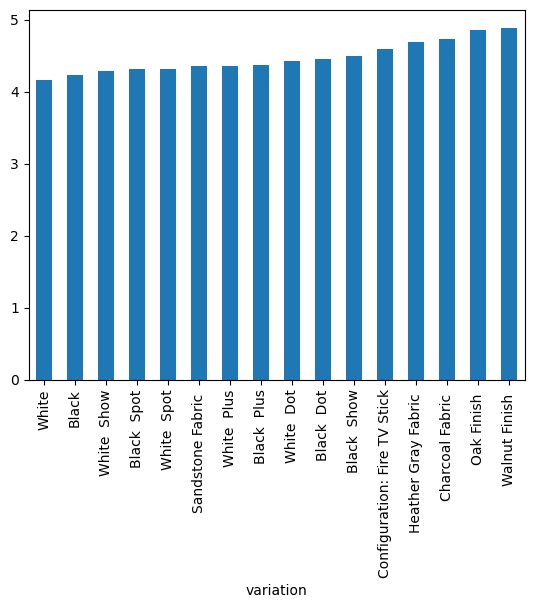

In [38]:
 data.groupby('variation')['rating'].mean(). sort_values().plot.bar()

In [39]:
# Analyzing verified review columns

# It contatils textual reviews given by the user.


In [40]:
data['Length'].describe()

count    3149.000000
mean      132.090187
std       182.114569
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: Length, dtype: float64

C:\Users\HOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Length', ylabel='Count'>

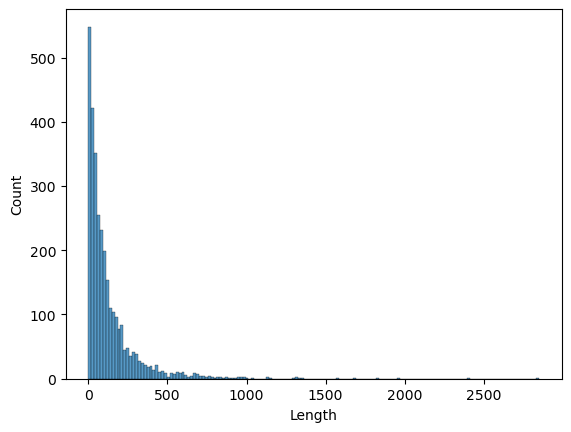

In [41]:
sns.histplot(data['Length'])

C:\Users\HOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Length', ylabel='Count'>

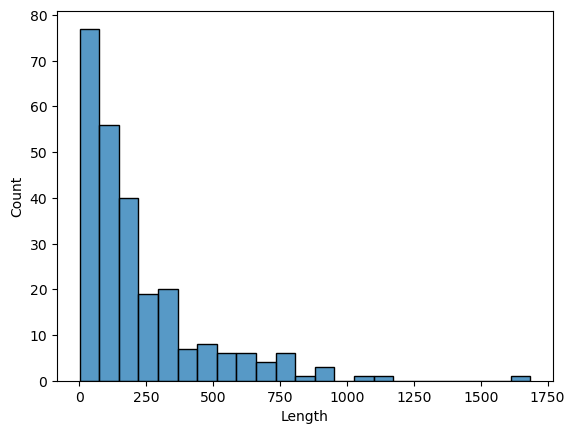

In [42]:
sns.histplot(data[data['feedback']==0]['Length'])

C:\Users\HOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Length', ylabel='Count'>

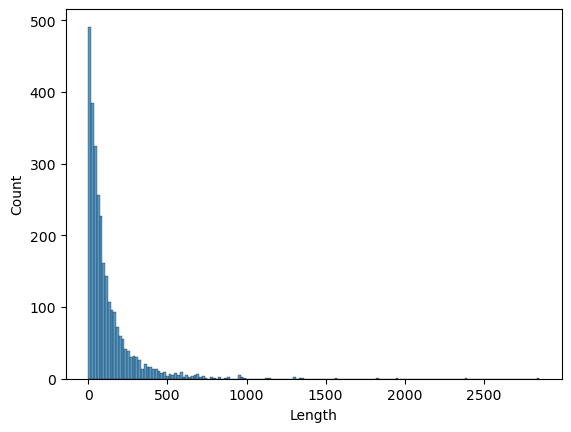

In [43]:
sns.histplot(data[data['feedback']==1]['Length'])

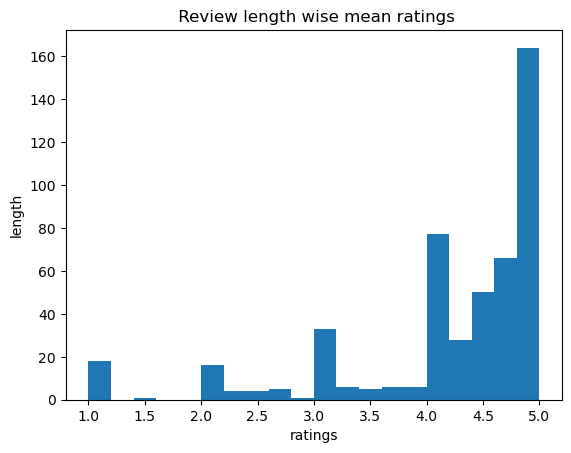

In [44]:
data.groupby('Length')['rating'].mean().plot.hist(bins=20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
cv=CountVectorizer()
words=cv.fit_transform(data.verified_reviews)

In [47]:
words

<3149x4044 sparse matrix of type '<class 'numpy.int64'>'
	with 60851 stored elements in Compressed Sparse Row format>

In [49]:
reviews = " ".join([ review for review in data['verified_reviews']])

In [50]:
reviews

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [51]:
from wordcloud import WordCloud

In [52]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [53]:
#All reviews
wc=WordCloud(background_color='white')

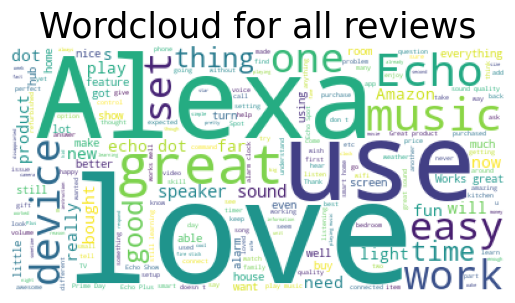

In [54]:
plt.imshow(wc.generate(reviews))
plt.axis('off')
plt.title('Wordcloud for all reviews', fontsize=25)
plt.show()

Lets find the unique words in each feedback category

In [55]:
# Combine all reviews for each feedback category and splitting them into individual words

neg_reviews= ''.join( [review for review in data[data['feedback']==0]['verified_reviews']])
neg_reviews=neg_reviews.lower().split()

In [56]:
pos_reviews=''.join( [review for review in data[data['feedback']==1]['verified_reviews']])
pos_reviews=pos_reviews.lower().split()

In [57]:
#Finding words from reviews which are present in that feedback category only

unique_negative= [ i for i in neg_reviews if i not in pos_reviews]
unique_negative=''.join(unique_negative)

In [58]:
unique_positive= [ i for i in pos_reviews if i not in neg_reviews]
unique_positive=''.join(unique_positive)

In [59]:
wc=WordCloud(background_color='white',max_words=50)

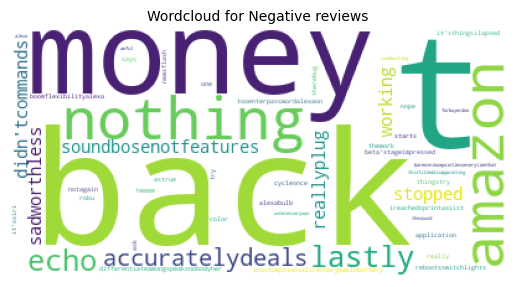

In [60]:
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for Negative reviews', fontsize=10)
plt.axis('off')
plt.show()

**Negative words can be seen in the above wordcloud such as sad worthless  nothing.**

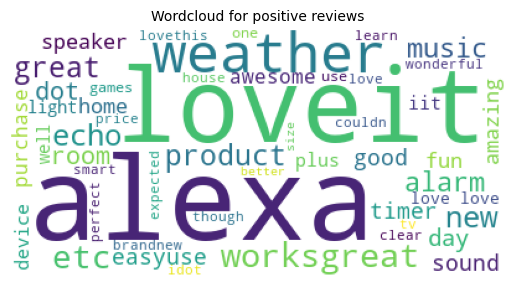

In [61]:
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

**Positive words can be seen in the above wordcloud such as love it, fun, awesome.**

# Preprocessing and Modelling

To build the corpus from the 'verified_reviews' we perform the following -

Replace any non alphabet characters with a space
Covert to lower case and split into words
Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus

In [96]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Get the English stopwords
stop_words = set(stopwords.words('english'))

corpus = []

for i in range(0, data.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])  # Clean the text
    review = review.lower().split()  # Convert to lowercase and split into words
    review = [stemmer.stem(word) for word in review if word not in stop_words]  # Stemming and remove stopwords
    review = ' '.join(review)  # Join the words back into a single string
    corpus.append(review)


In [99]:
cv=CountVectorizer()

In [107]:
##Storing independent and dependent variables in X and y

x=cv.fit_transform(corpus).toarray()
y=data['feedback'].values

In [109]:
print(x.shape)
print(y.shape)

(3149, 2765)
(3149,)


# Splitting data into train and test set with 20% data with testing.

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8, random_state=23)

In [113]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(2519, 2765)
(630, 2765)
(2519,)
(630,)


In [114]:
# We'll scale X_train and X_test so that all values are between 0 and 1.

from sklearn.preprocessing import MinMaxScaler

In [116]:
mm=MinMaxScaler()
xtrain_scaled=mm.fit_transform(xtrain)
xtest_scaled=mm.transform(xtest)

# Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay

In [119]:
rf_model=RandomForestClassifier()
rf_model.fit(xtrain_scaled,ytrain)

RandomForestClassifier()

In [122]:
#Accuracy of the model on training and testing data

Train_accuracy=rf_model.score(xtrain_scaled,ytrain)
Test_accuracy=rf_model.score(xtest_scaled,ytest)

In [125]:
print(Train_accuracy)
print(Test_accuracy)

0.9928543072647876
0.926984126984127


In [ ]:
#Overfitting

In [126]:
#Predicting on the test set
ypred=rf_model.predict(xtest_scaled)

In [ ]:
# confusion matrix

In [129]:
cm=confusion_matrix(ytest,ypred)

In [135]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm)

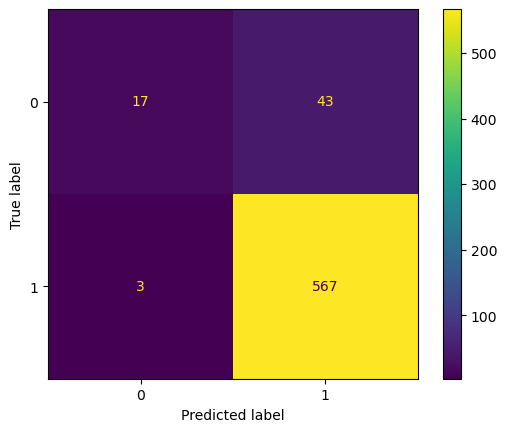

In [137]:
cm_display.plot()
 

In [146]:
#K fold cross-validation

from sklearn.model_selection import cross_val_score,GridSearchCV

In [141]:
Accuracies=cross_val_score(estimator=rf_model,X=xtrain_scaled,y=ytrain, cv=5)

In [142]:
Accuracies

array([0.94642857, 0.94246032, 0.92460317, 0.93849206, 0.93836978])

In [143]:
Accuracies.mean()

0.9380707816592508

In [144]:
Accuracies.std()

0.00735885851703858

In [145]:
#Applying grid search to get the optimal parameters on random forest

params={'max_depth':[80,90],
       'min_samples_split':[8,12]}

In [147]:
gridmodel=GridSearchCV(estimator=rf_model, param_grid=params, cv=3)

In [148]:
gridmodel.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [80, 90], 'min_samples_split': [8, 12]})

In [149]:
gridmodel.best_params_

{'max_depth': 80, 'min_samples_split': 8}

In [150]:
#XG Boost

In [151]:
from xgboost import XGBClassifier

In [153]:
model_xgb=XGBClassifier()
model_xgb.fit(xtrain_scaled,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [154]:
#Accuracy of the model on training and testing data

print('Training Accuracy', model_xgb.score(xtrain_scaled, ytrain))
print('Test Accuracy', model_xgb.score(xtest_scaled, ytest))

Training Accuracy 0.9753870583564906
Test Accuracy 0.919047619047619


In [156]:
ypred=model_xgb.predict(xtest)

In [158]:
cm=confusion_matrix(ytest,ypred)
cm

array([[ 19,  41],
       [ 10, 560]], dtype=int64)

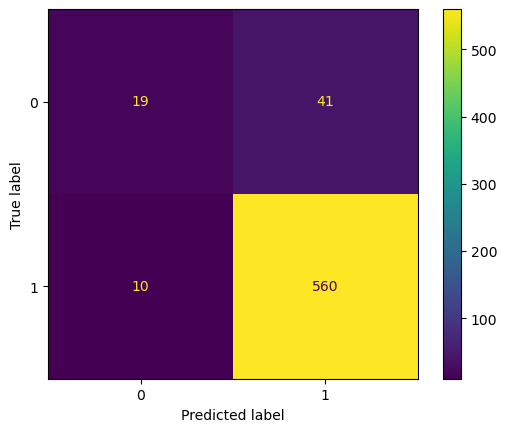

In [160]:
cmdisplay=ConfusionMatrixDisplay(confusion_matrix=cm)
cmdisplay.plot()

In [161]:
#Decision tree clasifier

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
model_tree=DecisionTreeClassifier()

In [164]:
model_tree.fit(xtrain_scaled,ytrain)

DecisionTreeClassifier()

In [166]:
Training=model_tree.score(xtrain_scaled,ytrain)
Testing=model_tree.score(xtest_scaled,ytest)
print(Training)
print(Testing)

0.9928543072647876
0.9111111111111111


In [168]:
ypred=model_tree.predict(xtest)

In [170]:
cm=confusion_matrix(ytest,ypred)

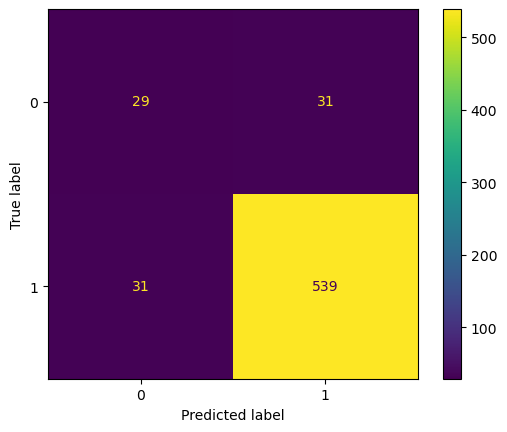

In [171]:
display=ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()